In [4]:
import numpy as np
import qiskit as qk
import matplotlib.pyplot as plt
from qiskit import Aer
from sklearn.decomposition import PCA
from tqdm.notebook import tqdm

import sys
sys.path.insert(0, '../../src/')
from neuralnetwork import *
from analysis import *
from utils import *

#%matplotlib notebook
%matplotlib inline
%load_ext autoreload
%autoreload 2

In [5]:
backend = Aer.get_backend('qasm_simulator')

### Training Models

### Generate Data

In [6]:
np.random.seed(42)

n = 10
x = np.linspace(0, 1, n)
x = generate_meshgrid([x,x])

mean1 = np.array([[0.25, 0.75]])
var1 = np.array([[0.02, 0], [0, 0.02]])

mean2 = np.array([[0.75, 0.25]])
var2 = np.array([[0.02, 0], [0, 0.02]])

mean3 = np.array([[0.25, 0.25]])
var3 = np.array([[0.02, 0], [0, 0.02]])

mean4 = np.array([[0.75, 0.75]])
var4 = np.array([[0.02, 0], [0, 0.02]])

y = gaussian(x, mean1, var1) + gaussian(x, mean2, var2) - gaussian(x, mean3, var3) - gaussian(x, mean4, var4)


x_qnn = scaler(x, a=0, b=np.pi)
x_dnn = (x - np.mean(x, axis=0))/np.std(x, axis=0)
y = scaler(y, a=0, b=1)

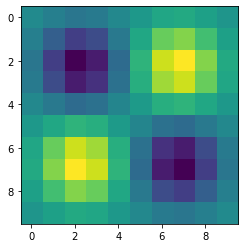

In [7]:
plt.imshow(y.reshape(n,n))
plt.show()

In [14]:
np.random.seed(42)
qnn = sequential_qnn(q_bits = [2, 4],
                     dim = [2, 4, 1],
                     reps = 2,
                     backend=backend,
                     shots=10000,
                     lr = 0.1)  

In [15]:
qnn.train(x, y, epochs=100, verbose=True)

  0%|          | 0/100 [00:00<?, ?it/s]

epoch: 0, loss: 0.059360527983141634
epoch: 1, loss: 0.038240373946094454
epoch: 2, loss: 0.03610655849513612
epoch: 3, loss: 0.036387731422157094
epoch: 4, loss: 0.029505828733429672
epoch: 5, loss: 0.03194624550878772
epoch: 6, loss: 0.033179818124868074
epoch: 7, loss: 0.029948484856993415
epoch: 8, loss: 0.030003516088230323
epoch: 9, loss: 0.0304123307803489
epoch: 10, loss: 0.02802170062069416
epoch: 11, loss: 0.026969036191485145


KeyboardInterrupt: 